<a href="https://colab.research.google.com/github/Shreyasv1rotate/TSF-GRIP-TASKS/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Everyone, in this code segment, we would create a machine learning algorithm, that would forecast a time series data with a certain degree of precision. For this project, we would download the data from the following URL.

URL:https://www.kaggle.com/datasets/nathsri1983/monthy-milk

Now, the necessary libraries must be imported into one place, to maintain the cleanliness of the code segment.

In [42]:
#We would begin by importing all our necessary libraries, required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

Now, we would import the data into the code segment. The data source must be a reliable one, in order to avoid abnormal results

In [43]:
df=pd.read_csv("monthly-milk-production.csv",index_col='Month',parse_dates=True)
df.index.freq='MS'
df.head(168)

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


Now, we would plot the Monthly Production data against time i.e Month

<Axes: xlabel='Month'>

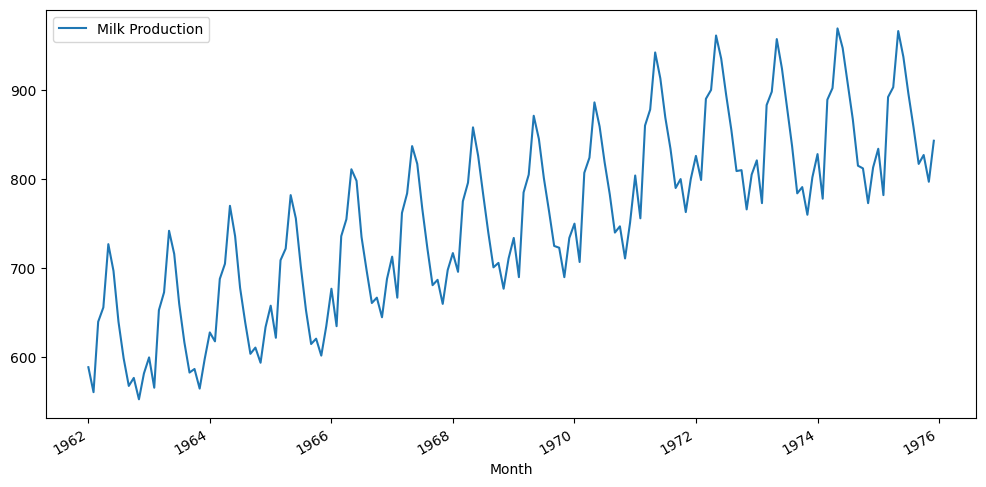

In [44]:
df.plot(figsize=(12,6))

Now, we would find the seasonal decompose. Seasonal decomposition methods can be useful for various purposes, including forecasting, anomaly detection, and understanding the underlying dynamics of time series data. One common technique for seasonal decomposition is the seasonal decomposition of time series (STL) algorithm, which separates these components effectively.


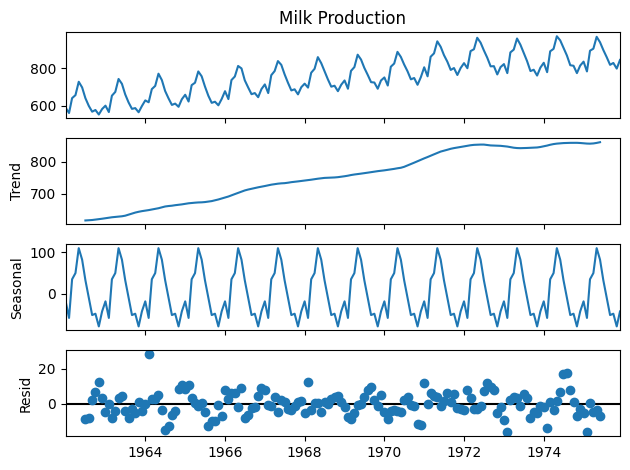

In [45]:
results = seasonal_decompose(df['Milk Production'])
results.plot();

Now, we would divide the data into train and test sets. This step is called Feature Scaling.

In [46]:
print("total values :",len(df))
train = df.iloc[:156]
test = df.iloc[156:]

total values : 168


Now, we would Normalize the data. Normalizing the data is very important, as it reduces data abnormality and eliminates redundant data.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
df.head(),df.tail()

(                     Milk Production
 Month                               
 1962-01-01 01:00:00            589.0
 1962-02-01 01:00:00            561.0
 1962-03-01 01:00:00            640.0
 1962-04-01 01:00:00            656.0
 1962-05-01 01:00:00            727.0,
                      Milk Production
 Month                               
 1975-08-01 01:00:00            858.0
 1975-09-01 01:00:00            817.0
 1975-10-01 01:00:00            827.0
 1975-11-01 01:00:00            797.0
 1975-12-01 01:00:00            843.0)

We are now required to train and test the model. The Model is trained using 80% of our data and it is tested using the rest 20%.

In [49]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [50]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [51]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

In [52]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
Predict this y: 
 [[0.11298077]]


In [53]:
X.shape

(1, 12, 1)

Here, we declare the LSTM. LSTM is a kind of RNN, that makes the forecasting quicker than usual.

In [54]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 5s 19ms/step - loss: 0.0423
Epoch 2/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0262
Epoch 3/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0207
Epoch 4/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0176
Epoch 5/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0110
Epoch 6/50
144/144 [==============================] - 3s 21ms/step - loss: 0.0072
Epoch 7/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0066
Epoch 8/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0048
Epoch 9/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0043
Epoch 10/50
144/144 [==============================] - 2s 17ms/step - loss: 0.0038
Epoch 11/50
144/144 [==============================] - 3s 21ms/step - loss: 0.0042
Epoch 12/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0028
Epoch 13/50
1

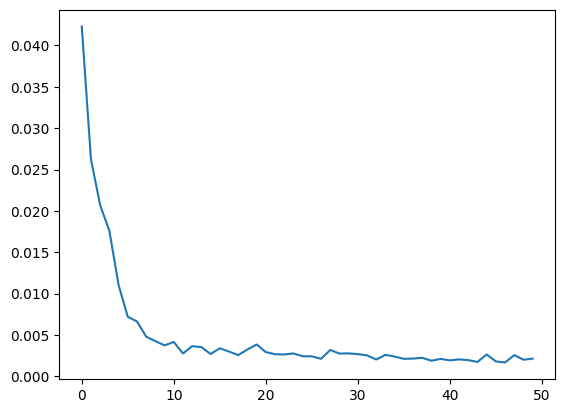

In [57]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [58]:
last_train_batch = scaled_train[-12:]

In [59]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [60]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 348ms/step


array([[0.6611159]], dtype=float32)

In [61]:
scaled_test[0]

array([0.67548077])

In [62]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 35ms/step


In [63]:
test_predictions

[array([0.6611159], dtype=float32),
 array([0.6293224], dtype=float32),
 array([0.8113305], dtype=float32),
 array([0.87288034], dtype=float32),
 array([0.97425973], dtype=float32),
 array([0.95229566], dtype=float32),
 array([0.8819771], dtype=float32),
 array([0.79158455], dtype=float32),
 array([0.6838793], dtype=float32),
 array([0.64869756], dtype=float32),
 array([0.5978747], dtype=float32),
 array([0.640924], dtype=float32)]

In [64]:
test.head()

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0


In [65]:
true_predictions = scaler.inverse_transform(test_predictions)

In [66]:
test['Predictions'] = true_predictions

<ipython-input-66-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Month'>

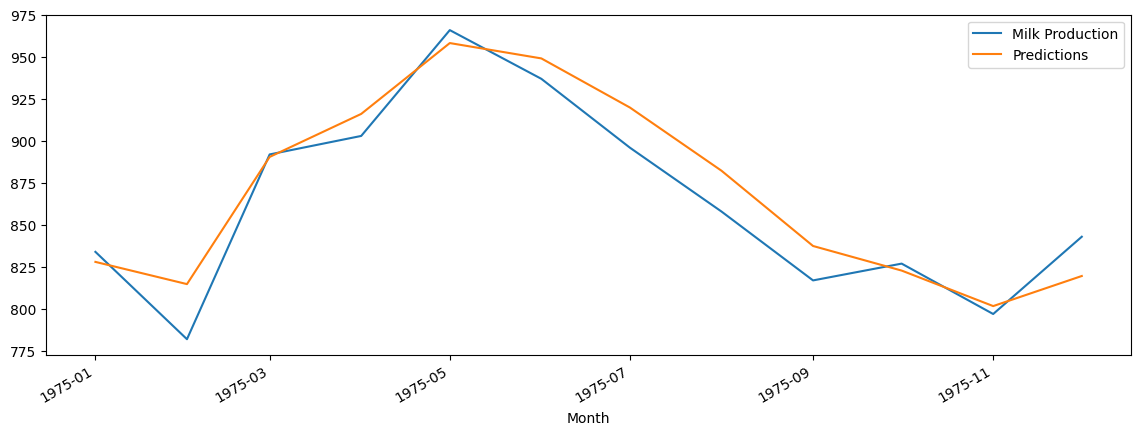

In [67]:
test.plot(figsize=(14,5))

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Milk Production'],test['Predictions']))
print(rmse)

17.465366039114766
